In [3]:
import matplotlib.pyplot as plt
import sympy as sp

In [4]:
# Definir Symbols
t,s =sp.symbols('t,s')
A =sp.Symbol('A')
# Definir la funcion
f = 1
# Laplace
sp.laplace_transform(f,t,s,noconds=True)
# Inversa de Laplace
sp.inverse_laplace_transform(f,s,t,noconds=True)

DiracDelta(t)

# Ejercicio 1

Suponga que la transformada de Laplace de la solución de una EDO está dada por

$ \mathcal{L}\left\lbrace x (t) \right\rbrace (s) = \dfrac{(s-1)(s+1)(s-2)(s+2)(s-3)(s+3)}{s^2(s+1)^2(s^2-1)^2} $

encuentre la solución $x(t)$.

In [21]:
f = ((s-1)*(s+1)*(s-2)*(s+2)*(s-3)*(s+3))/(s**2)*((s+1)**2)*(s**2-1)**2
sp.inverse_laplace_transform(f,s,t,noconds=True)

13*InverseLaplaceTransform((s + 1)**3*(s**2 - 1)**2, s, t, _None) - 36*InverseLaplaceTransform((s + 1)**3*(s**2 - 1)**2/s**2, s, t, _None) + 36*InverseLaplaceTransform((s + 1)**3*(s**2 - 1)**2/s, s, t, _None) - 13*InverseLaplaceTransform(s*(s + 1)**3*(s**2 - 1)**2, s, t, _None) - InverseLaplaceTransform(s**2*(s + 1)**3*(s**2 - 1)**2, s, t, _None) + InverseLaplaceTransform(s**3*(s + 1)**3*(s**2 - 1)**2, s, t, _None)

# Ejercicio 2

La función definida formalmente como

$ \delta(t-a) = \left\lbrace
\begin{matrix}
0 & \textrm{si} & t\neq a \\
& &\\
\infty &  \textrm{si} & t = a 
\end{matrix}
\right.$

se denomina delta de Dirac o impulso unitario.

Para utilizar dicha función utilizamos el comando sp.DiracDelta.

Calcular la transformada de Laplace de $\delta(t)$ y $\delta(t-A)$, para $A \in \mathbb{R}$

In [22]:
A = sp.Symbol('A') # Simbolo A
f = sp.DiracDelta(t) # delta(t)
g = sp.DiracDelta(t-A) # delta(t-A)
sp.laplace_transform(f,s,t,noconds=True) # Transformada de delta(t)
sp.laplace_transform(g,s,t,noconds=True) # Transformada de delta(t-A)

LaplaceTransform(1, s, t)*DiracDelta(-A + t)

# Ejercicio 3

calcule
$ \mathcal{L} \left\lbrace f(t)  \delta(t-A) \right\rbrace (s)  $

para 
* $f(t)=t$
* $f(t)=t^2$
* $f(t)=t^3$
* $ f(t) = \sin (kt) ; k\in \mathbb{R}$
* $ f(t) = \cos (kt) ; k\in \mathbb{R}$

A partir de sus resultados, establezca una una fórmula general para
$ \mathcal{L} \left\lbrace f(t)  \delta(t-A) \right\rbrace (s)$
con $f$ arbitrario.

In [23]:
f = t * sp.DiracDelta(t-A)
sp.laplace_transform(f,s,t,noconds=True)

t*LaplaceTransform(1, s, t)*DiracDelta(-A + t)

In [24]:
f = t**2 * sp.DiracDelta(t-A)
sp.laplace_transform(f,s,t,noconds=True)

t**2*LaplaceTransform(1, s, t)*DiracDelta(-A + t)

In [25]:
f = t**3 * sp.DiracDelta(t-A)
sp.laplace_transform(f,s,t,noconds=True)

t**3*LaplaceTransform(1, s, t)*DiracDelta(-A + t)

In [26]:
f = sp.sin(3*t) * sp.DiracDelta(t-A)
sp.laplace_transform(f,s,t,noconds=True)

LaplaceTransform(1, s, t)*sin(3*t)*DiracDelta(-A + t)

In [27]:
f = sp.cos(3*t) * sp.DiracDelta(t-A)
sp.laplace_transform(f,s,t,noconds=True)

LaplaceTransform(1, s, t)*cos(3*t)*DiracDelta(-A + t)

## Ejercicio 4

Suponga que tras aplicar transformada de Laplace a un PVI resulta lo siguiente:

$  \mathcal{L} \left\lbrace y(t) \right\rbrace (s) =   4 - 2 e^{-3s} \sin(3) $

Calcule (sin usar python) $y(t)$. 

## Ejercicio 5

Verifique que su conjetura del ejercicio anterior es correcta calculando 
$\mathcal{L}^{-1}\left\lbrace  4 - 2 e^{-3s} \sin(3) \right\rbrace (t)$
usando Python.

In [28]:
f =  4 - (2*sp.exp(-3*s))*sp.sin(3)
sp.inverse_laplace_transform(f,s,t,noconds=True)

4*DiracDelta(t) - 2*sin(3)*DiracDelta(t - 3)

## Ejercicio 6

Resolver el PVI
$$ y''' = f(t),  $$
con condiciones iniciales $y''(0)=y'(0)=1, y(0)=0$, donde $f$ está definida por

$$
f(t) = \left\lbrace
\begin{matrix}
2 & si & t<3 \\
t & si & 3 \leq t \leq 4 \\
te^{A(t-4)} & si & t>4
\end{matrix}
\right.
$$

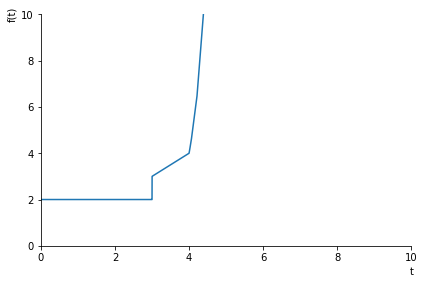

In [5]:
f = 2 + (t-2)*sp.Heaviside(t-3) - (t-(t*sp.exp(2*(t-4))))*sp.Heaviside(t-4) # Función de Heaviside
sp.plot(f,xlim=(0,10),ylim=(0,10)) # Graficando

In [14]:
# Transformada de Heaviside
transfHev = sp.laplace_transform(f,t,s,noconds=True) # Transformada de laplace de Heaviside
transfHev

4*s*exp(-4*s)/(s - 2)**2 - 7*exp(-4*s)/(s - 2)**2 + 2/s + exp(-3*s)/s - 4*exp(-4*s)/s + exp(-3*s)/s**2 - exp(-4*s)/s**2

In [11]:
Ly = (s + 1 + transfHev) / s**3
Ly

(s + 4*s*exp(-4*s)/(s - 2)**2 + 1 - 7*exp(-4*s)/(s - 2)**2 + 2/s + exp(-3*s)/s - 4*exp(-4*s)/s + exp(-3*s)/s**2 - exp(-4*s)/s**2)/s**3

In [13]:
y = sp.inverse_laplace_transform(Ly,s,t,noconds=True)
y

(8*t*(2*t**2 + 3*t + 6)*exp(8 - 2*t)*Heaviside(t) + 2*(t**4 - 8*t**3 + 18*t**2 - 27)*exp(8 - 2*t)*Heaviside(t - 3) - (2*t**4*exp(8 - 2*t) - 150*t**2*exp(8 - 2*t) + 724*t*exp(8 - 2*t) - 6*t - 993*exp(8 - 2*t) + 9)*Heaviside(t - 4))*exp(2*t - 8)/48

## Ejercicio 7

Para calcular derivadas, podemos utilizar el comando sp.diff( funcion , variable respecto a la que se deriva )

Por ejemplo, si $f(t)= At^3$, entonces su derivada se puede calcular vía

In [30]:
A=sp.Symbol('A')
sp.diff(A*t**2, t)

2*A*t

Más aun, se puede agregar una tercera entrada para indicar el orden de derivación, por ejemplo, si se desea calcular la segunda y tercera derivada de la misma función, utilizamos

In [31]:
sp.diff(A*t**2,t,2)

2*A

In [32]:
sp.diff(A*t**2,t,3)

0

Utilizando el teorema que establece (bajo ciertas condiciones) que 

$$ \mathcal{L} \left\lbrace t^n f(t) \right\rbrace (s) = (-1)^{n} \frac{d^n}{dt^n} \mathcal{L} \left\lbrace f(t) \right\rbrace (s)  $$

Calcule la transformada de Laplace de:

* $g(t)= t^{21} \sin(4t)$
* $g(t)=t^{7} e^{-2t}\cos t$
* $g(t)=t^{4} e^{-4t}\cos t \sin (2t)$


In [33]:
def derLap(f,n):
    trLap = sp.laplace_transform(f,t,s,noconds=True)
    return -1**n*sp.diff(trLap,s,n)

In [34]:
f = sp.sin(4*t)
n = 21
derLap(f,n)

408727537373675520000*s*(1048576*s**20/(s**2 + 16)**10 - 5242880*s**18/(s**2 + 16)**9 + 11206656*s**16/(s**2 + 16)**8 - 13369344*s**14/(s**2 + 16)**7 + 9748480*s**12/(s**2 + 16)**6 - 4472832*s**10/(s**2 + 16)**5 + 1281280*s**8/(s**2 + 16)**4 - 219648*s**6/(s**2 + 16)**3 + 20592*s**4/(s**2 + 16)**2 - 880*s**2/(s**2 + 16) + 11)/(s**2 + 16)**12

In [35]:
f = sp.exp(-2*t)*sp.cos(t)
n = 7
derLap(f,n)

-5040*(64*(s + 2)**6/((s + 2)**2 + 1)**3 - 80*(s + 2)**4/((s + 2)**2 + 1)**2 - 8*(s + 2)**2*(16*(s + 2)**6/((s + 2)**2 + 1)**3 - 24*(s + 2)**4/((s + 2)**2 + 1)**2 + 10*(s + 2)**2/((s + 2)**2 + 1) - 1)/((s + 2)**2 + 1) + 24*(s + 2)**2/((s + 2)**2 + 1) - 1)/((s + 2)**2 + 1)**4

In [36]:
f = sp.exp(-4*t)*sp.cos(t)*sp.sin(2*t)
n = 4
derLap(f,n)

-48*(8*(s + 4)**2*(2*(s + 4)**2/((s + 4)**2 + 1) - 1)*((s + 4)**2 + 3)/(((s + 4)**2 + 1)**2*((s + 4)**2 + 9)) - 8*(s + 4)**2*(2*(s + 4)**2/((s + 4)**2 + 1) - 1)/((s + 4)**2 + 1)**2 - 4*(s + 4)**2*(4*(s + 4)**2/((s + 4)**2 + 1) - 1)/(((s + 4)**2 + 1)*((s + 4)**2 + 9)) - 8*(s + 4)**2*(2*(s + 4)**2/((s + 4)**2 + 9) - 1)/((s + 4)**2 + 9)**2 + 8*(s + 4)**2*(2*(s + 4)**2/((s + 4)**2 + 9) - 1)*((s + 4)**2 + 3)/(((s + 4)**2 + 1)*((s + 4)**2 + 9)**2) - 4*(s + 4)**2*(4*(s + 4)**2/((s + 4)**2 + 9) - 1)/(((s + 4)**2 + 1)*((s + 4)**2 + 9)) + 4*(s + 4)**2/(((s + 4)**2 + 1)*((s + 4)**2 + 9)) + (4*(s + 4)**2/((s + 4)**2 + 1) - 1)*(4*(s + 4)**2/((s + 4)**2 + 9) - 1)*((s + 4)**2 + 3)/(((s + 4)**2 + 1)*((s + 4)**2 + 9)) + (4*(s + 4)**2/((s + 4)**2 + 1) - 1)/((s + 4)**2 + 1) + (4*(s + 4)**2/((s + 4)**2 + 9) - 1)/((s + 4)**2 + 9) + ((s + 4)**2 + 3)*(16*(s + 4)**4/((s + 4)**2 + 9)**2 - 12*(s + 4)**2/((s + 4)**2 + 9) + 1)/((s + 4)**2 + 9)**2 + ((s + 4)**2 + 3)*(16*(s + 4)**4/((s + 4)**2 + 1)**2 - 12*(s + 4)*